In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df=pd.read_csv("Factor-Hair-Revised.csv")

In [74]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [77]:
df.duplicated().sum()

0

In [32]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [78]:
df_pca=df.drop(['ID', 'Satisfaction', 'Ecom'], axis=1)

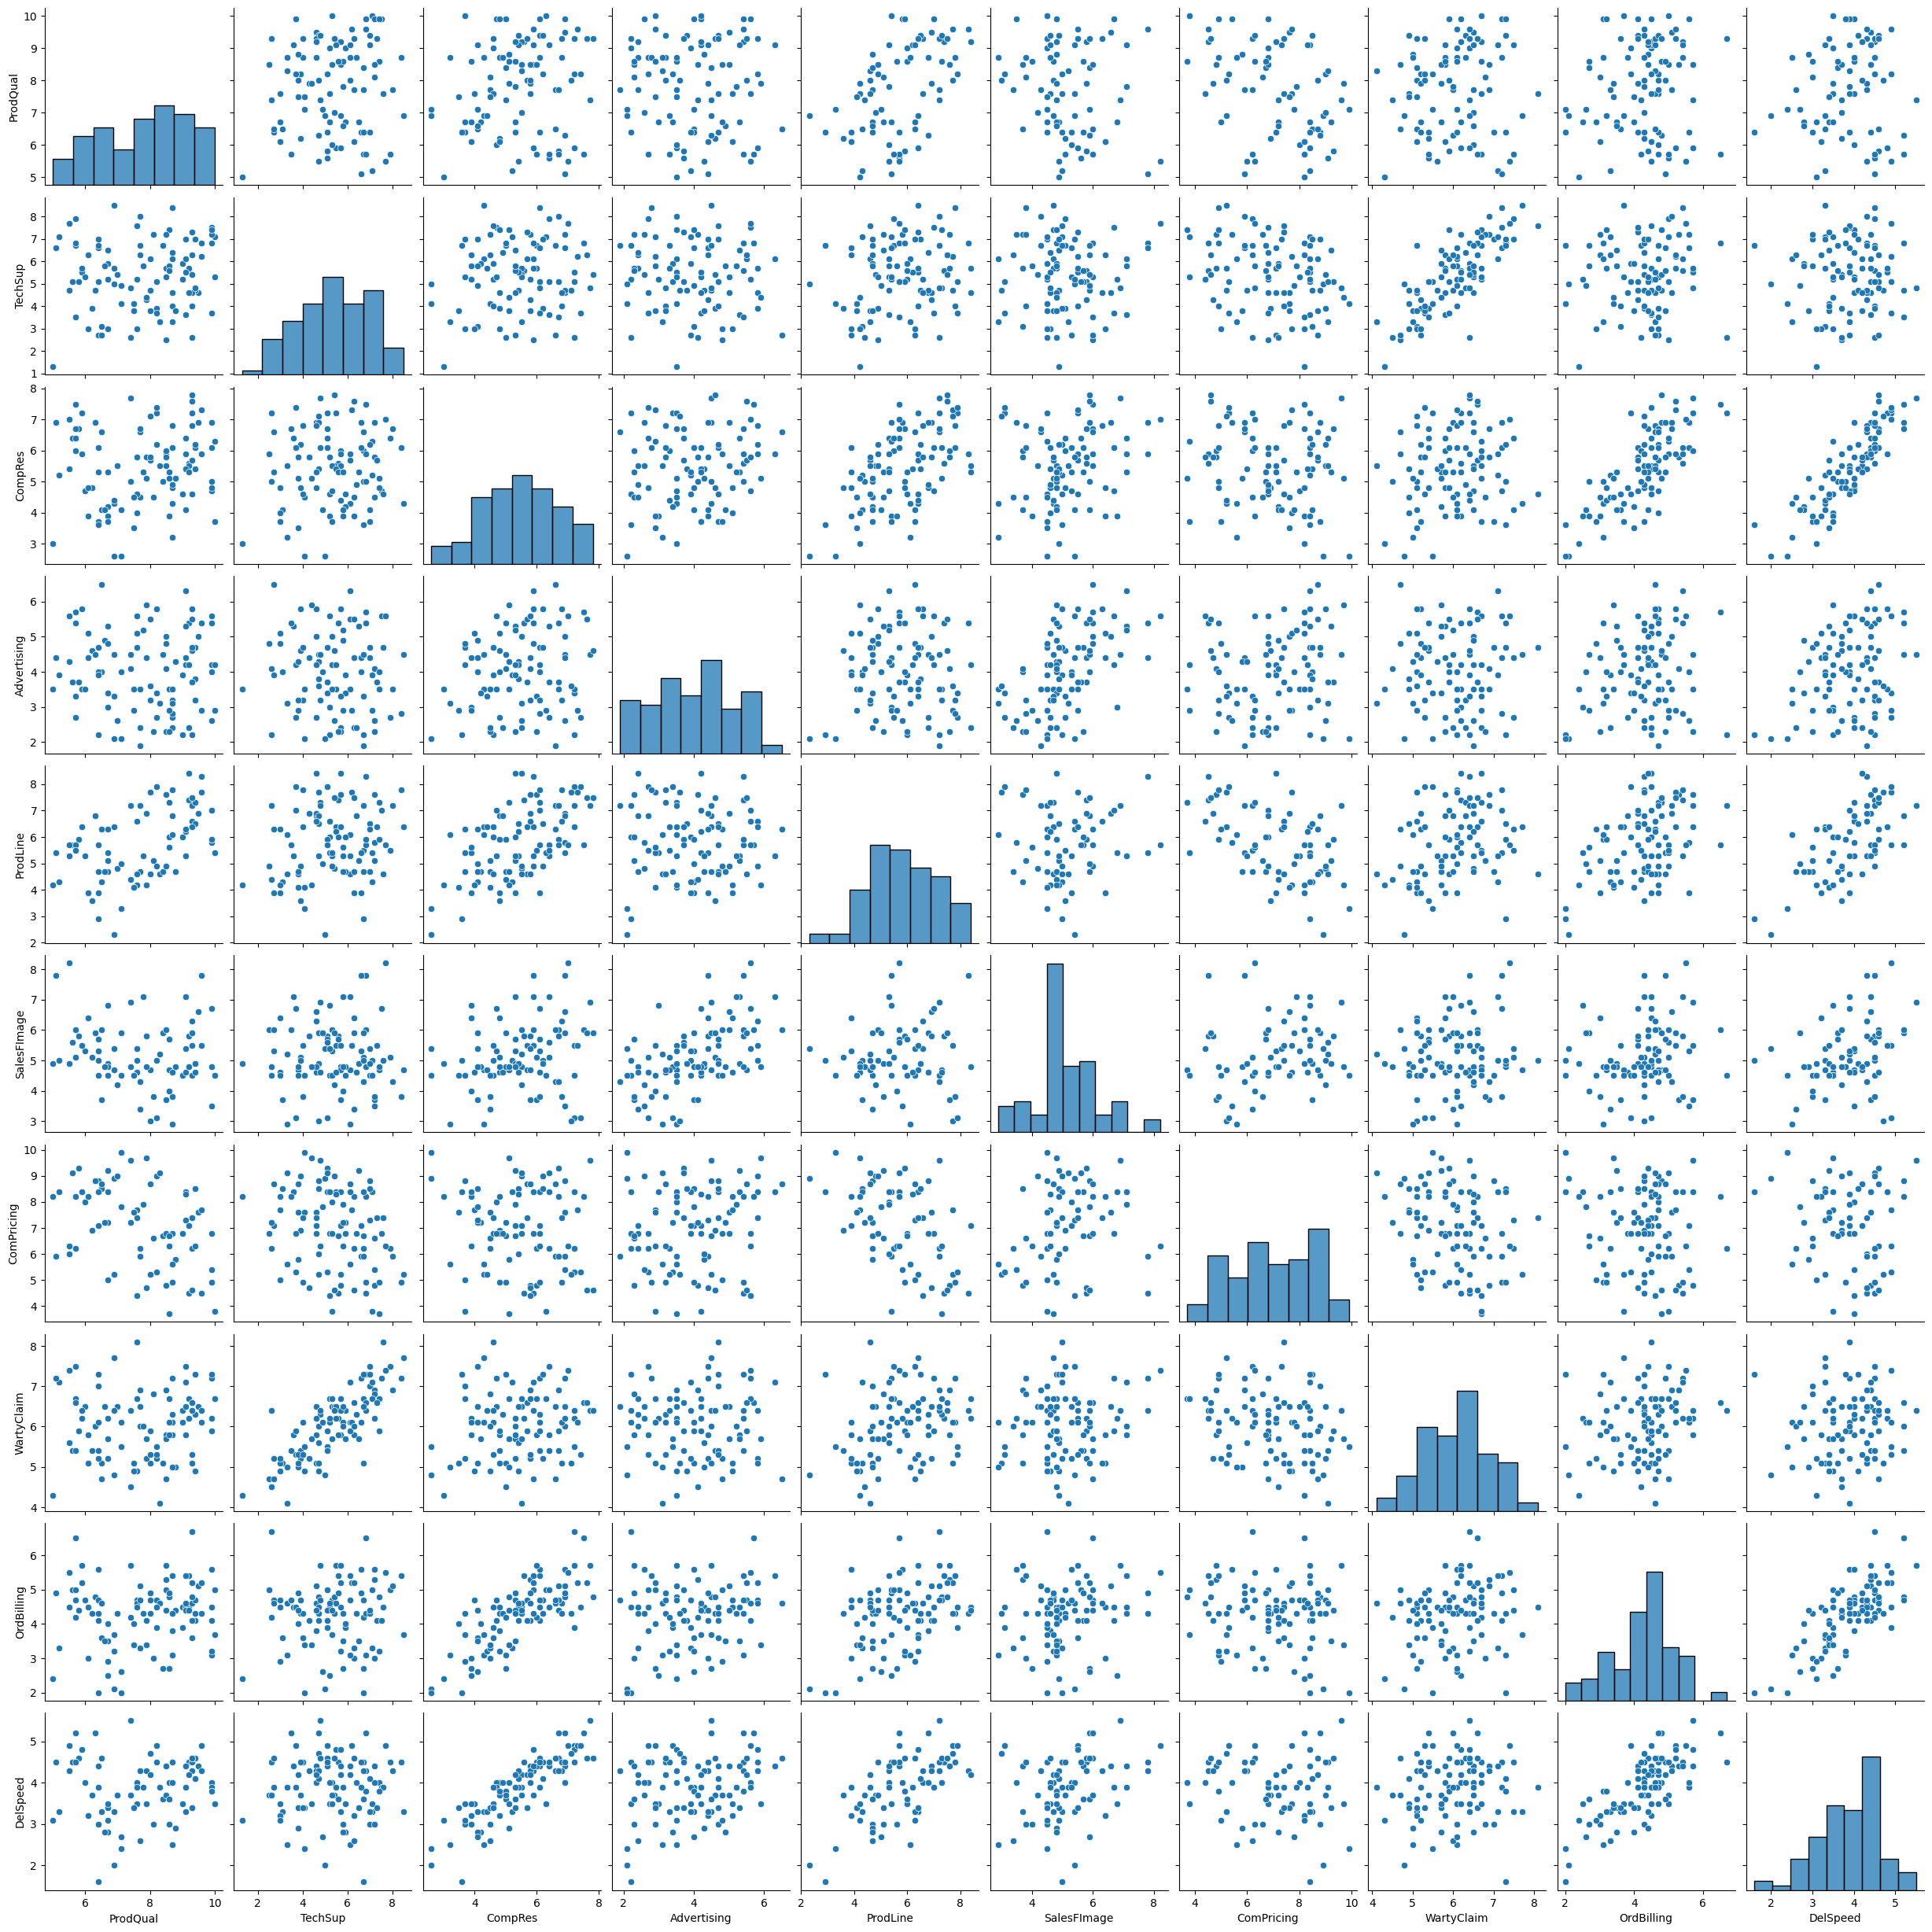

In [79]:
sns.pairplot(df_pca)

In [54]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7
DelSpeed,100.0,3.886,0.734437,1.6,3.400,3.90,4.425,5.5


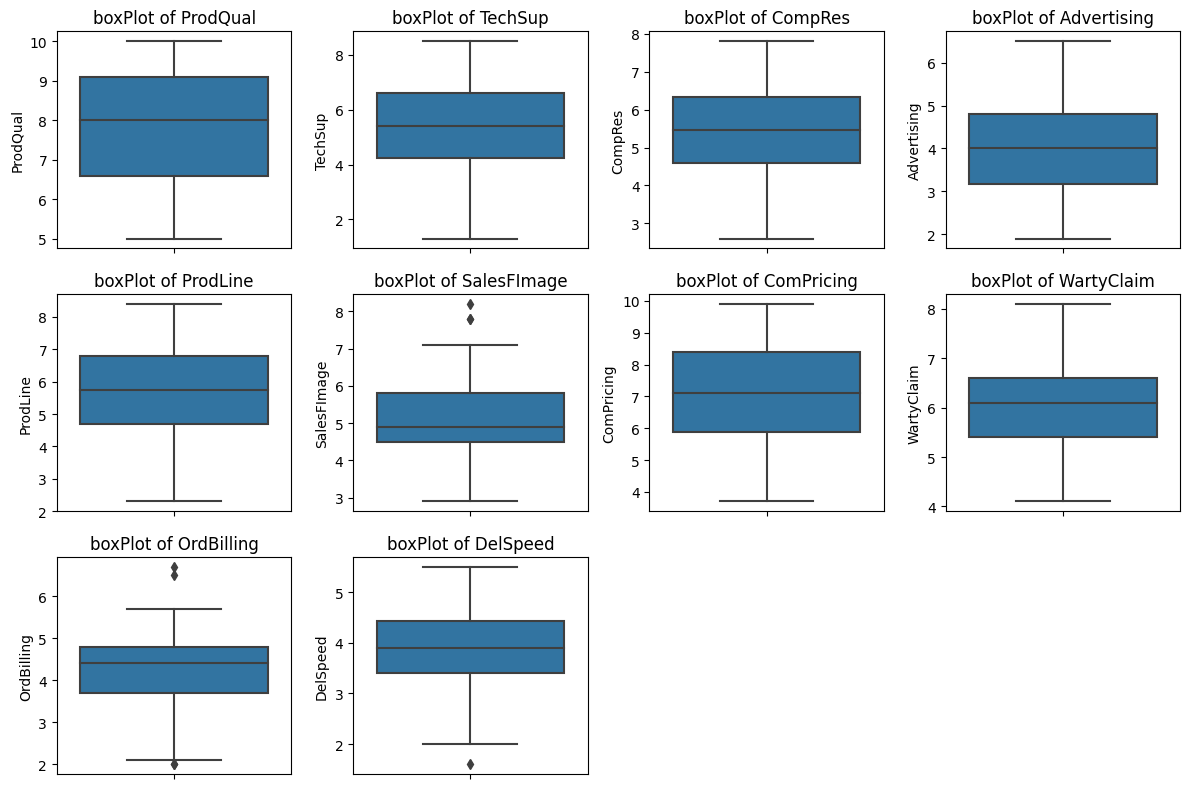

In [80]:
plt.figure(figsize=(12,8))
feature_list=df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df_pca[feature_list[i]], data=df_pca)
    plt.title('boxPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [82]:
#sns.scatterplot(x='ProdQual', y='Satisfaction', data=df_pca1)

<AxesSubplot: >

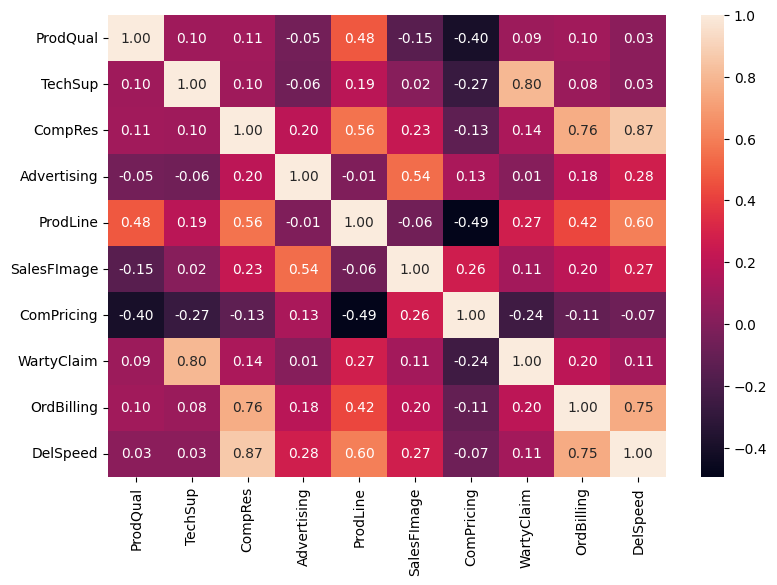

In [83]:
plt.figure(figsize=(9,6))
sns.heatmap(df_pca.corr(), annot=True, fmt=".2f")

In [84]:
df_pca.cov()

,ProdQual,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.949596,0.204293,0.179475,-0.084141,0.876919,-0.227303,-0.865697,0.101081,0.135273,0.028424
TechSup,0.204293,2.342298,0.178758,-0.108434,0.387753,0.027884,-0.640313,1.000106,0.113869,0.028596
CompRes,0.179475,0.178758,1.460238,0.268162,0.892313,0.297711,-0.238897,0.139085,0.849519,0.767766
Advertising,-0.084141,-0.108434,0.268162,1.270000,-0.017121,0.655222,0.233697,0.009970,0.192848,0.228323
ProdLine,0.876919,0.387753,0.892313,-0.017121,1.729975,-0.086480,-1.005828,0.294429,0.518495,0.581384
SalesFImage,-0.227303,0.027884,0.297711,0.655222,-0.086480,1.149870,0.438382,0.094456,0.194349,0.213861
ComPricing,-0.865697,-0.640313,-0.238897,0.233697,-1.005828,0.438382,2.387196,-0.310285,-0.164416,-0.082691
WartyClaim,0.101081,1.000106,0.139085,0.009970,0.294429,0.094456,-0.310285,0.671971,0.150046,0.065861
OrdBilling,0.135273,0.113869,0.849519,0.192848,0.518495,0.194349,-0.164416,0.150046,0.862743,0.512315
DelSpeed,0.028424,0.028596,0.767766,0.228323,0.581384,0.213861,-0.082691,0.065861,0.512315,0.539398


In [85]:
#Scaling
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

<AxesSubplot: >

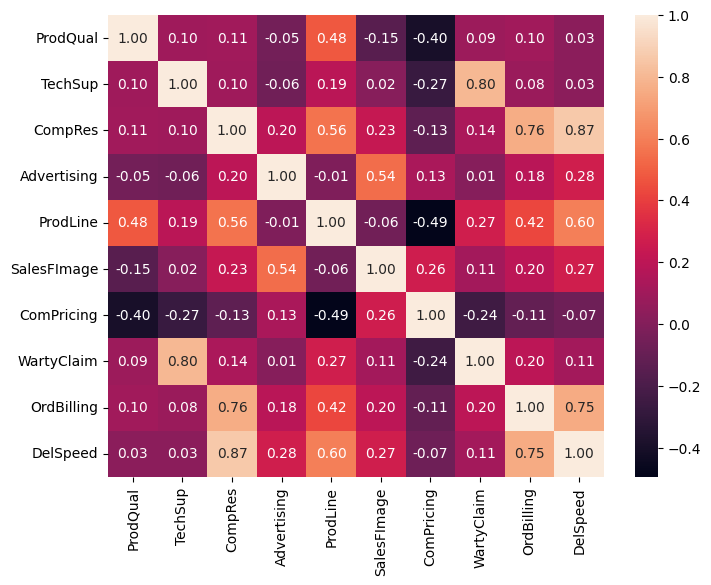

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pca_scaled.corr(), annot=True, fmt='.2f')

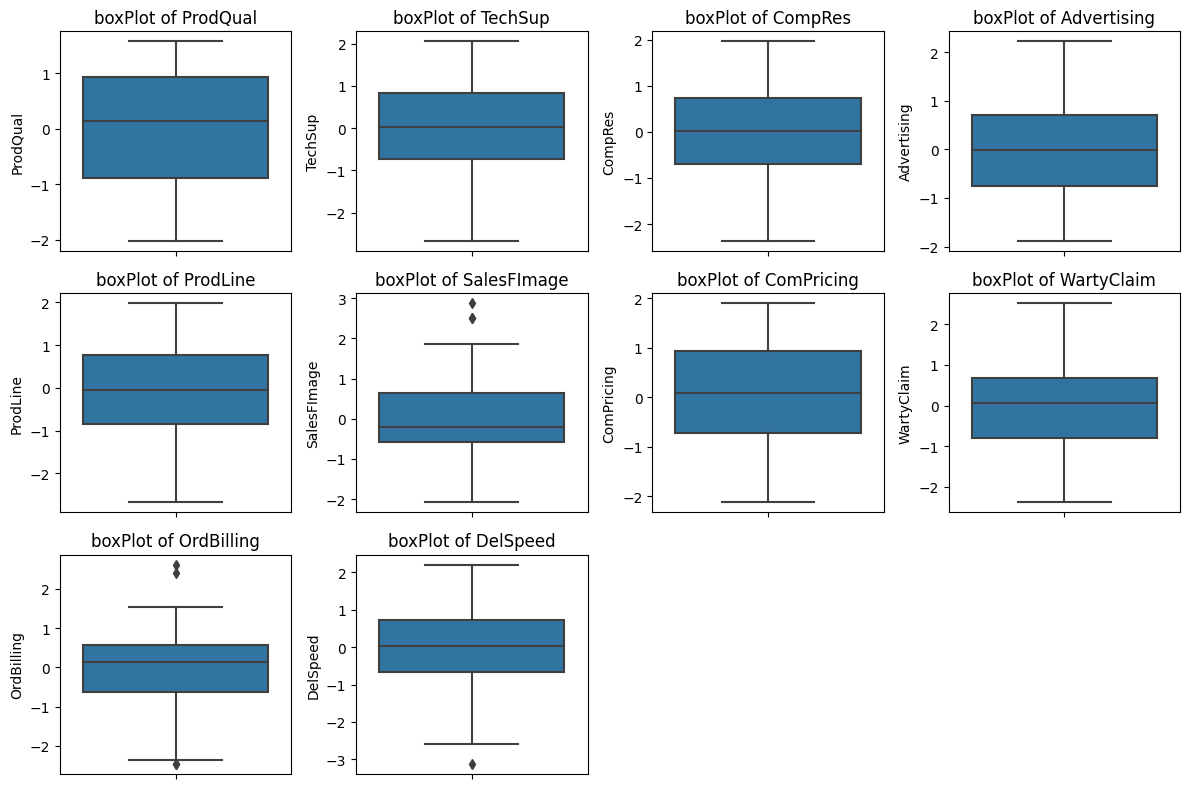

In [133]:
plt.figure(figsize=(12,8))
feature_list=df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df_pca_scaled[feature_list[i]], data=df_pca_scaled)
    plt.title('boxPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [134]:
df_pca_scaled.cov()

,ProdQual,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010101,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998
TechSup,0.096566,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698
CompRes,0.107444,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830
Advertising,-0.054013,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650
ProdLine,0.482317,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930
SalesFImage,-0.153346,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294
ComPricing,-0.405335,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608
WartyClaim,0.089204,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500
OrdBilling,0.105357,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589
DelSpeed,0.027998,0.025698,0.873830,0.278650,0.607930,0.274294,-0.073608,0.110500,0.758589,1.010101


In [29]:
#df_pca=df.drop(['ID', 'Satisfaction'], axis=1)

In [62]:
#after Scaling
feature_list=df_pca.columns
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

In [88]:
df_pca.head(10)

,ProdQual,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
5,6.5,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3
6,6.9,5.0,2.6,2.1,2.3,5.4,8.9,4.8,2.1,2.0
7,6.2,3.9,4.8,4.6,3.6,5.1,6.9,5.4,4.3,3.7
8,5.8,5.1,6.7,3.7,5.9,5.8,9.3,5.9,4.4,4.6
9,6.4,5.1,6.1,4.7,5.7,5.7,8.4,5.4,4.1,4.4


In [89]:
len(df_pca.columns)

10

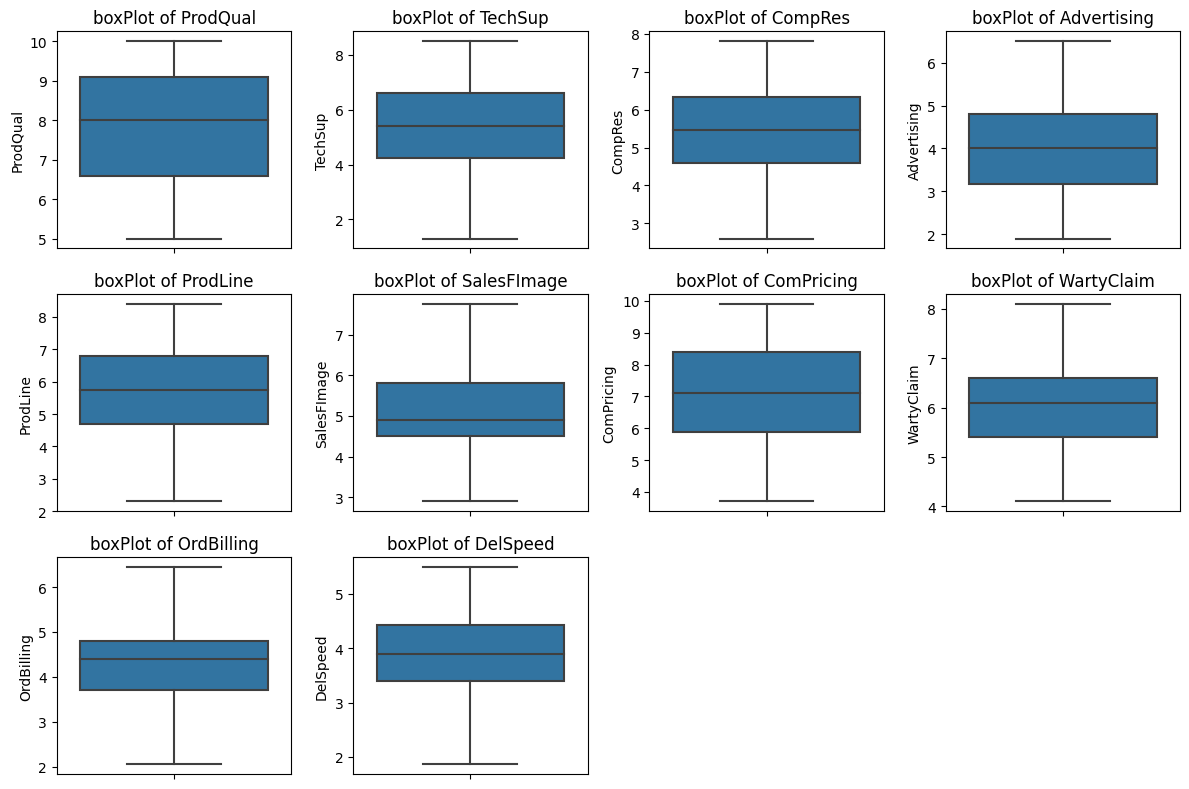

In [63]:
plt.figure(figsize=(12,8))
feature_list=df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df_pca[feature_list[i]], data=df_pca)
    plt.title('boxPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

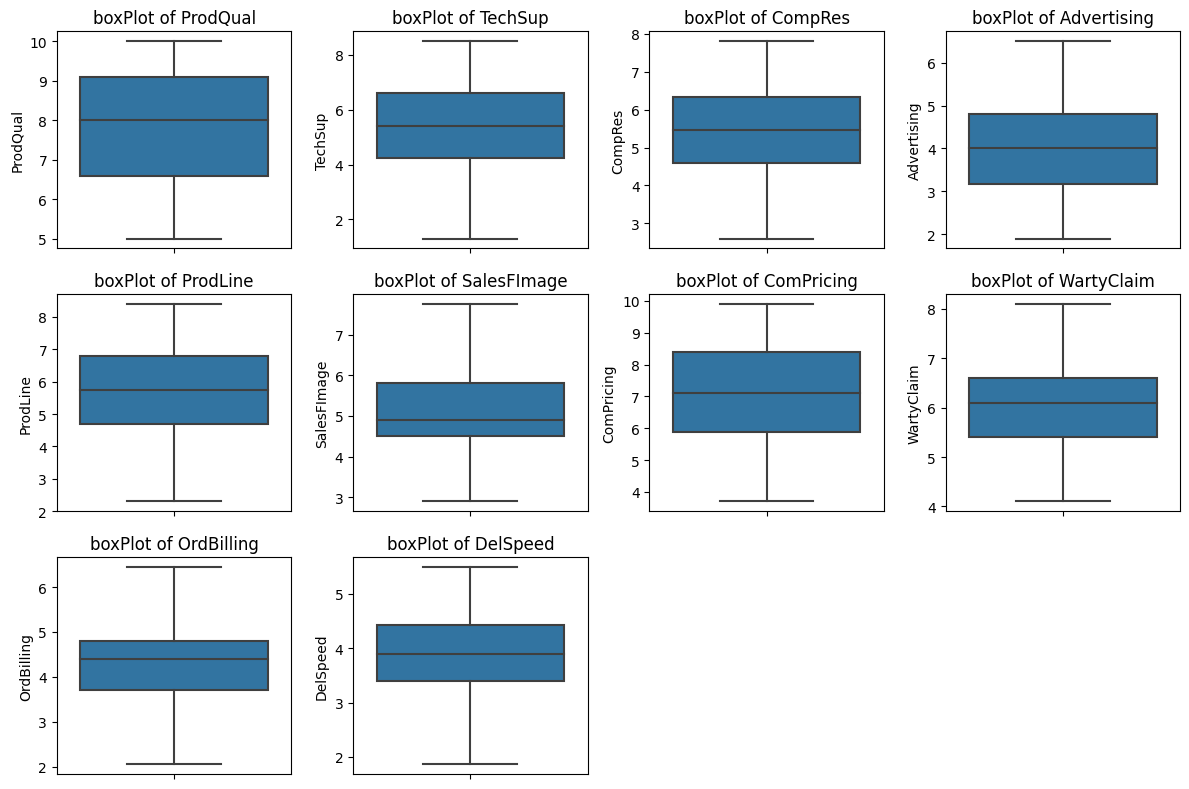

In [64]:
plt.figure(figsize=(12,8))
feature_list=df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df_pca[feature_list[i]], data=df_pca)
    plt.title('boxPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [99]:
df_pca_scaled.cov()

,ProdQual,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010101,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998
TechSup,0.096566,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698
CompRes,0.107444,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830
Advertising,-0.054013,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650
ProdLine,0.482317,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930
SalesFImage,-0.153346,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294
ComPricing,-0.405335,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608
WartyClaim,0.089204,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500
OrdBilling,0.105357,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589
DelSpeed,0.027998,0.025698,0.873830,0.278650,0.607930,0.274294,-0.073608,0.110500,0.758589,1.010101


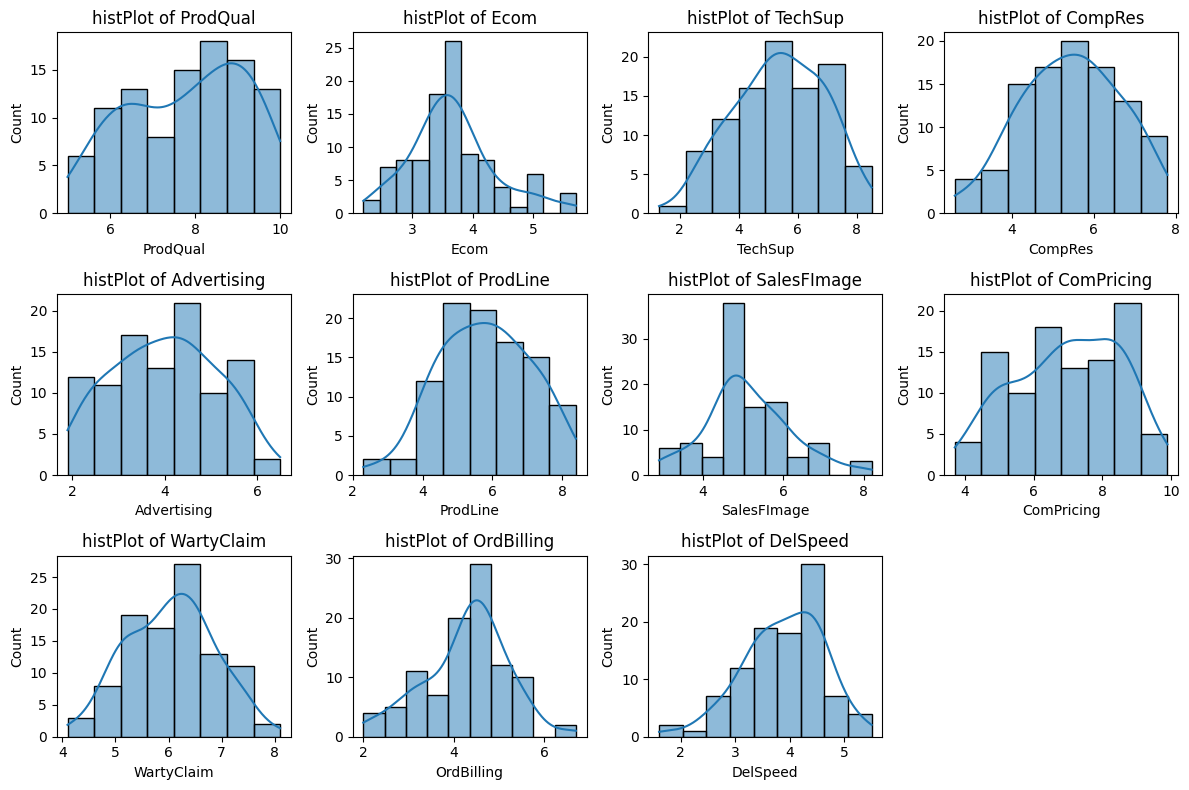

In [82]:
plt.figure(figsize=(12,8))
feature_list1=df_pca1.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.histplot(x=df_pca1[feature_list1[i]], kde=True)
    plt.title('histPlot of {}'.format(feature_list1[i]))
    plt.tight_layout()

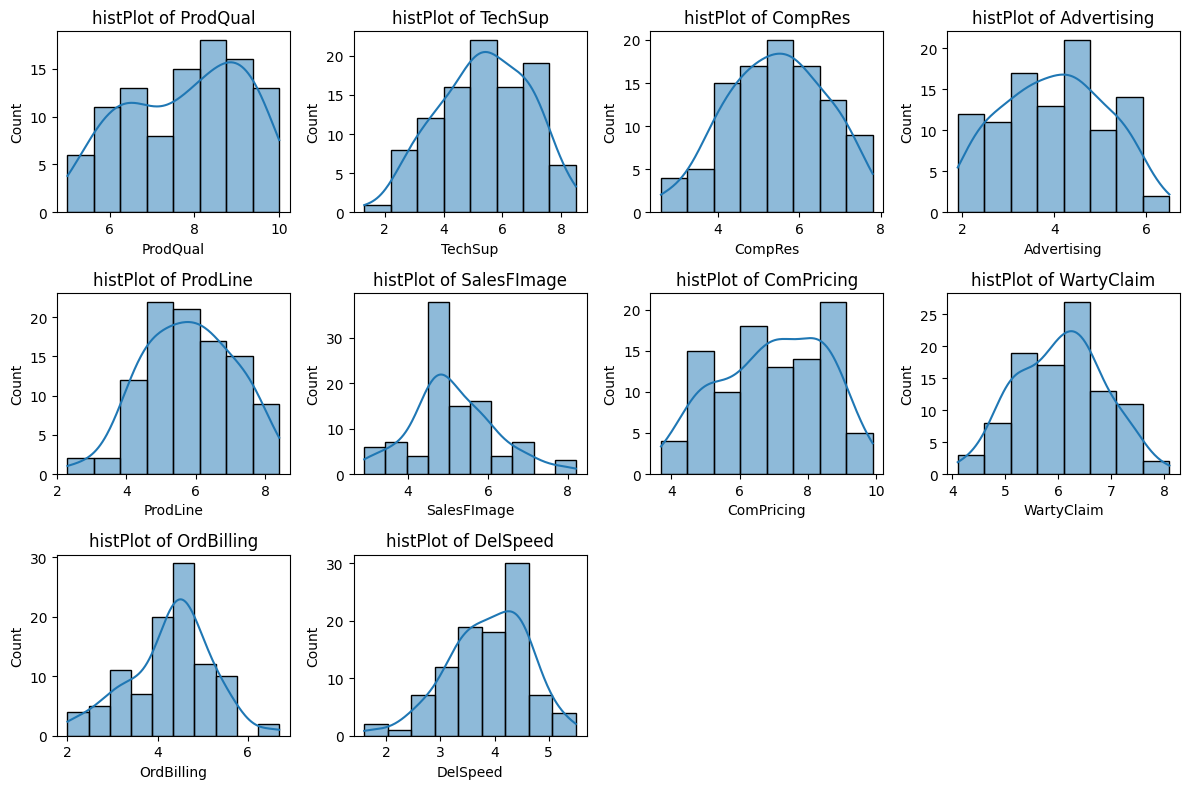

In [91]:
plt.figure(figsize=(12,8))
feature_list=df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.histplot(x=df_pca[feature_list[i]], kde=True)
    plt.title('histPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(df_pca.corr(), annot=True, fmt=".2f")

In [92]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7
DelSpeed,100.0,3.886,0.734437,1.6,3.400,3.90,4.425,5.5


In [57]:
df_pca_scaled.head()

,ProdQual,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


In [15]:
df_pca_scaled

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220
...,...,...,...,...,...,...,...,...,...,...,...
95,0.568640,1.618353,0.154322,-0.118102,-1.525024,0.149004,0.540797,-0.178233,-0.297929,0.673026,-0.391376
96,-0.295117,-0.390241,-1.815752,-0.367615,0.080264,-1.073591,-0.302734,0.147010,-1.891791,-0.084399,-0.254531
97,0.640619,-0.677183,-1.356068,-1.864688,-0.811562,0.225416,-2.083519,-0.893769,-1.278767,-1.274638,-1.896667
98,-0.007198,1.761824,0.285661,-0.118102,1.061274,-0.385881,1.852955,0.602351,-0.052720,0.023805,0.019158


In [88]:
# plt.figure(figsize=(8,6))
# sns.heatmap(df_pca_scaled.corr(), annot=True, fmt='.2f')

In [58]:
df_pca_scaled.cov()

,ProdQual,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010101,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998
TechSup,0.096566,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698
CompRes,0.107444,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830
Advertising,-0.054013,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650
ProdLine,0.482317,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930
SalesFImage,-0.153346,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294
ComPricing,-0.405335,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608
WartyClaim,0.089204,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500
OrdBilling,0.105357,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589
DelSpeed,0.027998,0.025698,0.873830,0.278650,0.607930,0.274294,-0.073608,0.110500,0.758589,1.010101


In [100]:
#confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value <0.5
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df_pca_scaled)
p_value

4.077831706221179e-83

In [101]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.6528074701458834

In [102]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [103]:
pca.components_

array([[-0.13862521, -0.13255163, -0.16169816, -0.47353676, -0.1761158 ,
        -0.39268125, -0.18960766,  0.15780895, -0.21620195, -0.44059722,
        -0.47527939],
       [-0.30616255,  0.46140667, -0.22578297,  0.03265571,  0.3640688 ,
        -0.27255203,  0.47203851,  0.40962005, -0.18553872,  0.04338501,
         0.08704893],
       [ 0.06709281, -0.22881574, -0.61626115,  0.20638388, -0.0906638 ,
         0.11796883, -0.23760663,  0.04673072, -0.60432141,  0.15770584,
         0.22342129],
       [ 0.64972486,  0.25658155, -0.18140816, -0.20421824,  0.33265598,
         0.20316157,  0.2349916 , -0.32936184, -0.17150521, -0.22900266,
        -0.19979577],
       [ 0.29035482,  0.40547352, -0.00914631,  0.02569798, -0.78168324,
         0.11128718,  0.19275175,  0.29415447, -0.01839439,  0.04402211,
        -0.03422493],
       [ 0.52977297, -0.30406454,  0.10842621,  0.03136166,  0.25830325,
        -0.10856804, -0.12869836,  0.69840604,  0.13820704,  0.10792548,
        -0.023

In [109]:
pca.components_[0]

array([-0.16769139, -0.17596117, -0.4733895 , -0.13800081, -0.42041589,
       -0.13494202,  0.1976868 , -0.22680363, -0.43805204, -0.46947525])

In [110]:
pca.explained_variance_

array([3.40819146, 2.1897756 , 1.58979714, 1.01213449, 0.57593913,
       0.43260415, 0.39761745, 0.24726987, 0.14760309, 0.10007772])

In [115]:
pca.explained_variance_ratio_

array([0.33741095, 0.21678778, 0.15738992, 0.10020131, 0.05701797,
       0.04282781, 0.03936413, 0.02447972, 0.01461271, 0.00990769])

In [116]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33741095, 0.55419874, 0.71158866, 0.81178997, 0.86880794,
       0.91163576, 0.95099988, 0.9754796 , 0.99009231, 1.        ])

In [113]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 
                                                                   'PC7', 'PC8', 'PC9','PC10'],
                                     index=df_pca_scaled.columns)

In [114]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ProdQual,-0.167691,-0.330597,-0.257431,0.572797,-0.600417,-0.174182,0.144017,0.128899,0.089915,0.178713
TechSup,-0.175961,-0.357497,0.562634,-0.117578,-0.066298,-0.090857,-0.066330,0.518278,-0.473421,-0.032590
CompRes,-0.473390,0.169622,-0.118662,-0.200457,-0.034925,0.012871,0.005570,0.499957,0.532913,-0.396859
Advertising,-0.138001,0.384934,0.231289,0.572578,0.317047,-0.497538,-0.309649,-0.000099,-0.006410,-0.086347
ProdLine,-0.420416,-0.220108,-0.218347,0.119984,-0.002778,0.365236,-0.507795,-0.318085,-0.288098,-0.370528
SalesFImage,-0.134942,0.413982,0.365982,0.351534,-0.123538,0.626803,0.372213,-0.006345,-0.075397,-0.021902
ComPricing,0.197687,0.442764,0.138871,-0.242581,-0.706788,-0.115129,-0.391373,-0.069305,-0.075526,-0.101313
WartyClaim,-0.226804,-0.302891,0.572445,-0.089517,-0.092527,-0.057268,-0.055871,-0.480753,0.513818,0.104959
OrdBilling,-0.438052,0.159256,-0.078284,-0.230813,-0.087575,-0.405578,0.526191,-0.349997,-0.347856,-0.175508
DelSpeed,-0.469475,0.230175,-0.121954,-0.178732,0.048127,0.079928,-0.222210,0.071918,-0.065939,0.782427


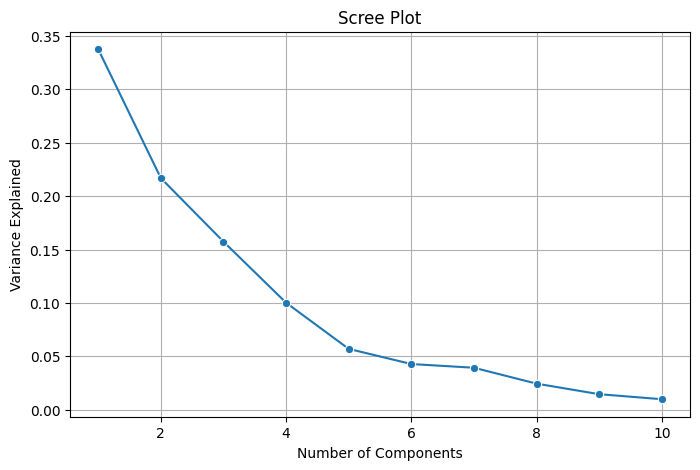

In [119]:
#create a Scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_, x=range(1,11), marker='o')
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Variance Explained', fontsize=10)
plt.title('Scree Plot', fontsize=12)
plt.grid()
plt.show()

In [120]:
df_selected = df_extracted_loadings[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

In [121]:
df_selected

,PC1,PC2,PC3,PC4,PC5
ProdQual,-0.167691,-0.330597,-0.257431,0.572797,-0.600417
TechSup,-0.175961,-0.357497,0.562634,-0.117578,-0.066298
CompRes,-0.473390,0.169622,-0.118662,-0.200457,-0.034925
Advertising,-0.138001,0.384934,0.231289,0.572578,0.317047
ProdLine,-0.420416,-0.220108,-0.218347,0.119984,-0.002778
SalesFImage,-0.134942,0.413982,0.365982,0.351534,-0.123538
ComPricing,0.197687,0.442764,0.138871,-0.242581,-0.706788
WartyClaim,-0.226804,-0.302891,0.572445,-0.089517,-0.092527
OrdBilling,-0.438052,0.159256,-0.078284,-0.230813,-0.087575
DelSpeed,-0.469475,0.230175,-0.121954,-0.178732,0.048127


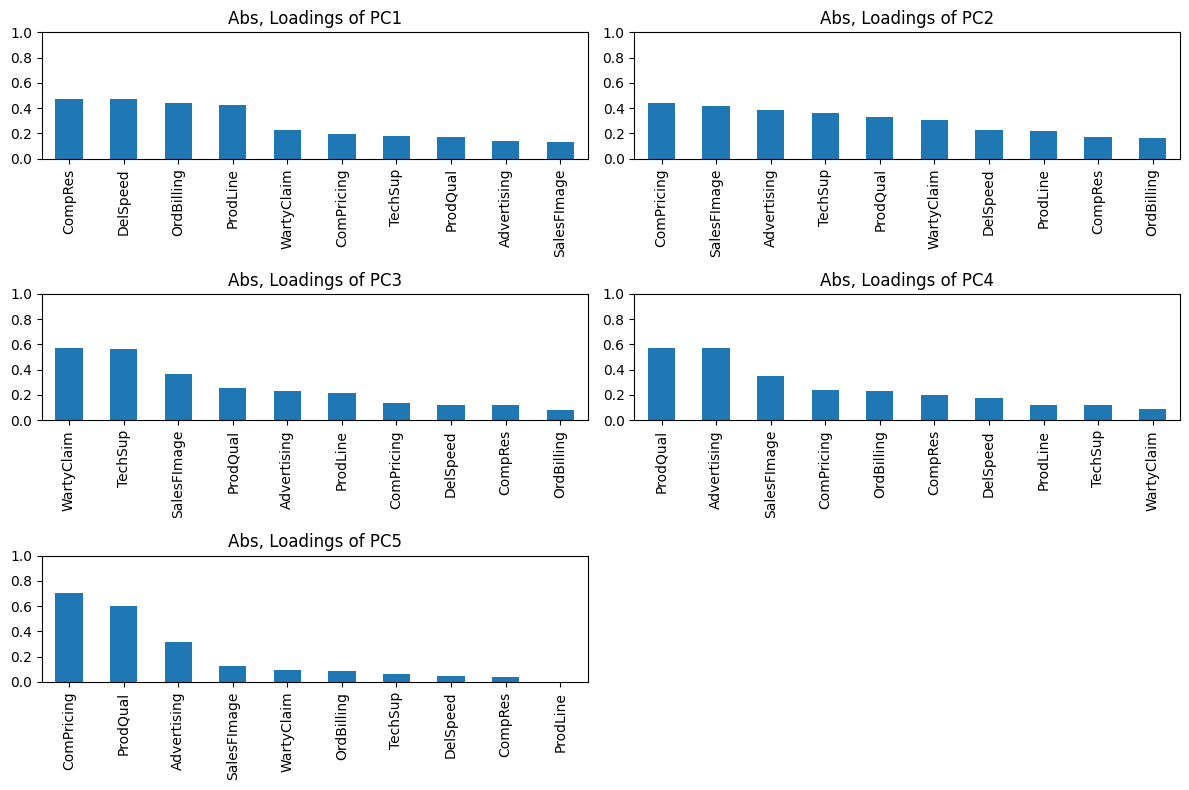

In [122]:
plt.figure(figsize=(12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending=False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs, Loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

<AxesSubplot: >

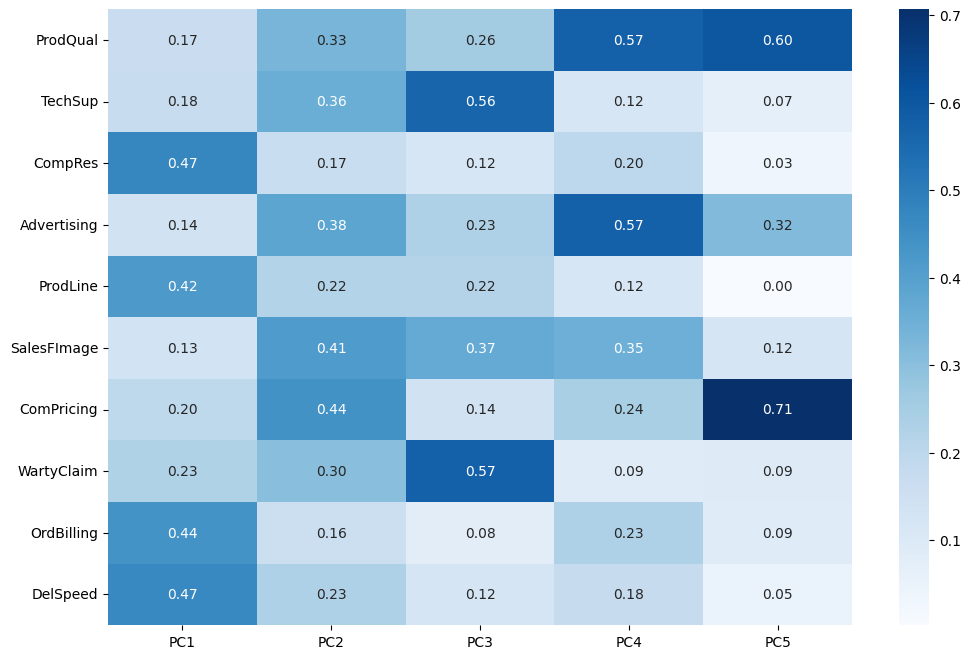

In [123]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(df_selected), annot=True, cmap='Blues', fmt='.2f')

In [130]:
df_selected

,PC1,PC2,PC3,PC4,PC5
ProdQual,-0.167691,-0.330597,-0.257431,0.572797,-0.600417
TechSup,-0.175961,-0.357497,0.562634,-0.117578,-0.066298
CompRes,-0.473390,0.169622,-0.118662,-0.200457,-0.034925
Advertising,-0.138001,0.384934,0.231289,0.572578,0.317047
ProdLine,-0.420416,-0.220108,-0.218347,0.119984,-0.002778
SalesFImage,-0.134942,0.413982,0.365982,0.351534,-0.123538
ComPricing,0.197687,0.442764,0.138871,-0.242581,-0.706788
WartyClaim,-0.226804,-0.302891,0.572445,-0.089517,-0.092527
OrdBilling,-0.438052,0.159256,-0.078284,-0.230813,-0.087575
DelSpeed,-0.469475,0.230175,-0.121954,-0.178732,0.048127


In [131]:
df_pca_scaled.iloc[0]

ProdQual       0.496660
TechSup       -1.881421
CompRes        0.380922
Advertising    0.704543
ProdLine      -0.691530
SalesFImage    0.821973
ComPricing    -0.113185
WartyClaim    -1.646582
OrdBilling     0.781230
DelSpeed      -0.254531
Name: 0, dtype: float64

In [132]:
#we need to perform dot product between the loadings and featuers to obtain the scores
for i in df_selected.columns:
    pc_score=np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end='')

0.2783831.851167-1.6052461.0787530.088661

In [127]:
pca=PCA(n_components=5, random_state=123)
pca_final=pca.fit_transform(df_pca_scaled)

In [128]:
pca_final_df=pd.DataFrame(pca_final, columns=df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,0.278383,1.851167,-1.605246,1.078753,0.088661
1,-1.587248,-1.155517,-2.182491,-0.727646,0.783065
2,-2.314303,-0.276152,-0.244313,1.550450,0.749446
3,1.543461,-0.217837,2.132887,-0.553345,-0.150148
4,0.550390,-1.413724,-0.748052,-0.407725,-0.895635
5,2.769201,0.839993,-1.069521,-0.578063,0.299920
6,5.434309,-0.010474,0.400903,-0.240846,-0.735268
7,1.533389,1.363633,-0.126686,-0.229862,1.045035
8,-0.477722,1.827215,0.283074,-1.500966,-0.340276
9,-0.066097,1.749699,0.063013,-0.373465,0.198357


<AxesSubplot: >

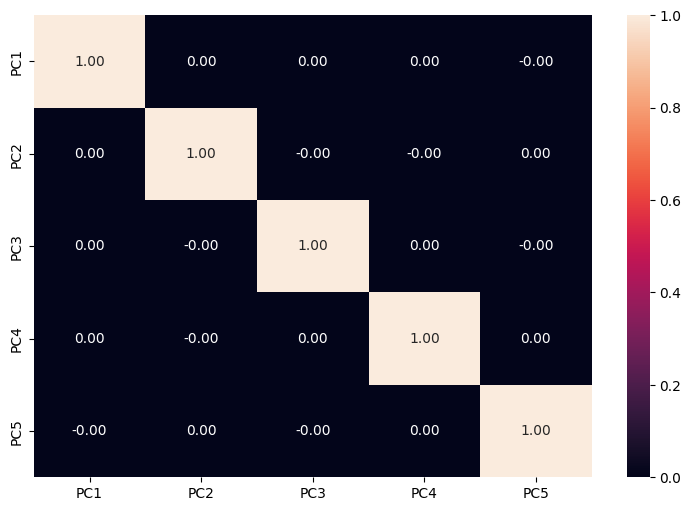

In [129]:
plt.figure(figsize=(9,6))
sns.heatmap(pca_final_df.corr(), annot=True, fmt='.2f')

In [61]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

KeyError: 'Satisfaction'